# Lab 01 - Nhận dạng chữ số viết tay

(Hãy đảm bảo bạn đã đọc qua tutorial LeNet để nắm rõ một số bước cần làm)

Trong Lab 01 này, bạn sẽ tiến hành cài đặt lại mô hình VGG16 [(Simonyan et al. 2014)](https://arxiv.org/abs/1409.1556) để train một model nhận dạng chữ số viết tay trên bộ dữ liệu MNIST -- tương tự những gì đã làm ở tutorial LeNet.

**Vui lòng tạo một bản copy của notebook này trên Google Drive của bạn**

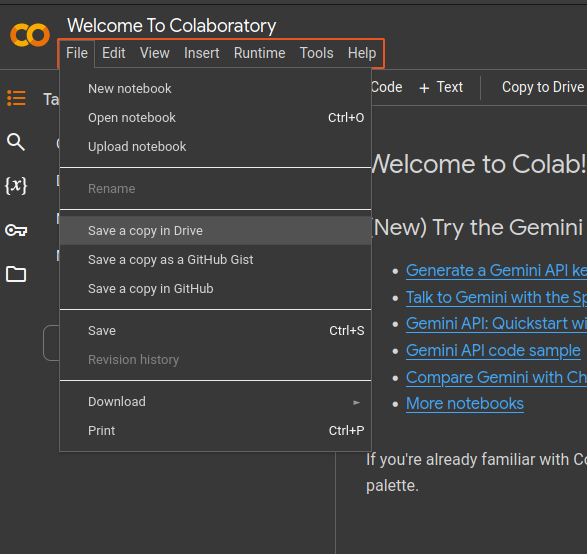

## Hướng dẫn làm bài

Bạn **chỉ điền vào các mục `#TODO` nội dung phù hợp**, sau đó chạy các notebook cells. Tránh modify các đoạn code không có `# TODO` để không bị các bug khác.

## Cài đặt các package cần thiết

Tương tự như LeNet, ta vẫn dùng pytorch và torchvision cho lab này.

In [1]:
!pip install torch==2.2.0
!pip install torchvision==0.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Import các package

In [2]:
import torch, torchvision

## Set seed & một số thông số

In [3]:
import random
import numpy as np

random_state = 42

torch.manual_seed(random_state)
random.seed(random_state)
np.random.seed(random_state)

In [4]:
# TODO: một số thông số huấn luyện

# Batch size: 64
batch_size = 64

# Learning rate: 0.001
learning_rate = 0.001

# Training epochs: 10
num_epochs = 10

In [5]:
# Kiểm tra batch size, learning rate và số training epochs đã đúng chưa?

print(f"Batch size = {batch_size}, learning_rate = {learning_rate}, num_epochs = {num_epochs}")

Batch size = 64, learning_rate = 0.001, num_epochs = 10


Cell trên nên in ra nội dung sau:

```
Batch size = 64, learning_rate = 0.001, num_epochs = 10
```

## Tạo dataloader

In [6]:
# TODO: tạo training dataset (tương tự notebook LeNet)

training_dataset = torchvision.datasets.MNIST(
    root="./data",                                # Lưu ở folder /data
    train=True,                                   # Load tập train
    transform=torchvision.transforms.Compose([    # Thực hiện các bước preprocessing
        torchvision.transforms.Resize((32, 32)),  # Resize ảnh về 32x32 (cho hợp với kiến trúc LeNet)
        torchvision.transforms.ToTensor(),        # Chuyển ảnh về dạng Tensor
        torchvision.transforms.Normalize(         # Normalize ảnh từ [0-255] về [0-1]
            mean=(.1307,),
            std=(.3081,)
        )
    ]),
    download=True                                 # Download data nếu không có sẵn
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18088263.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488338.14it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4544454.28it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4422128.31it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
# TODO: tạo testing dataset (tương tự notebook LeNet)

testing_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,                                  # Load tập test
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize((32, 32)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=(.1325,),
            std=(.3105,)
        )
    ]),
    download=True
)

In [8]:
# TODO: tạo training dataloader (tương tự notebook LeNet)

training_dataloader = torch.utils.data.DataLoader(
    dataset=training_dataset,
    shuffle=True,
    batch_size=batch_size
)

In [9]:
# TODO: tạo testing dataloader (tương tự notebook LeNet)

testing_dataloader = torch.utils.data.DataLoader(
    dataset=testing_dataset,
    shuffle=True,
    batch_size=batch_size
)

## Dùng CPU hay GPU?

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
device

device(type='cuda')

## Model

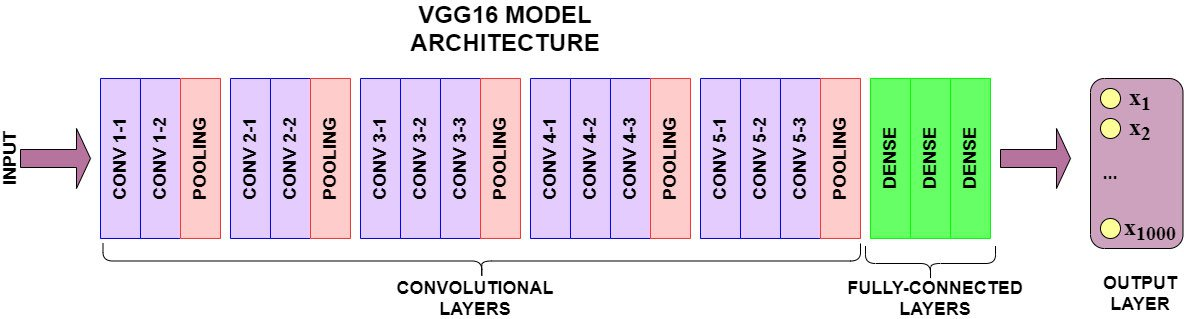

Đây là kiến trúc của VGG16, train cho bộ ImageNet 1000 class, kích thước mỗi ảnh đầu vào là $227\times 227\times 3$. Ở lab này, ta sẽ hiệu chỉnh một số thông số của mô hình VGG16 cho tập dữ liệu MNIST (trong đó kích thước mỗi ảnh là $32\times 32\times 1$).

Lưu ý: bạn nên **bám sát** miêu tả network.

In [12]:
class VGG16(torch.nn.Module):
    def __init__(self, **kwargs):
        super(VGG16, self).__init__()

        self.num_classes = kwargs.get("num_classes", 10)
        self.dropout_rate = kwargs.get("dropout_rate", .5)

        # Layer 1: 1 layer Conv2d với in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=64
        #          1 layer activation ReLU
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU()
        )

        # Layer 2: 1 layer Conv2d với in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=64
        #          1 layer activation ReLU
        #          1 layer MaxPool2d với kernel_size=2, stride=2
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Layer 3: 1 layer Conv2d với in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=128
        #          1 layer activation ReLU
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU()
        )

        # Layer 4: 1 layer Conv2d với in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=128
        #          1 layer activation ReLU
        #          1 layer MaxPool2d với kernel_size=2, stride=2
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Layer 5: 1 layer Conv2d với in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=256
        #          1 layer activation ReLU
        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=256),
            torch.nn.ReLU()
        )

        # Layer 6: 1 layer Conv2d với in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=256
        #          1 layer activation ReLU
        self.layer6 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=256),
            torch.nn.ReLU()
        )


        # Layer 7: 1 layer Conv2d với in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=512
        #          1 layer activation ReLU
        #          1 layer MaxPool2d với kernel_size=2, stride=2
        self.layer7 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Layer 8: 1 layer Conv2d với in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=512
        #          1 layer activation ReLU
        self.layer8 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.ReLU()
        )

        # Layer 9: 1 layer Conv2d với in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1
        #          1 layer BatchNorm2d với num_features=512
        #          1 layer activation ReLU
        self.layer9 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.ReLU()
        )

        # Layer 10: 1 layer Conv2d với in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1
        #           1 layer BatchNorm2d với num_features=512
        #           1 layer activation ReLU
        #           1 layer MaxPool2d với kernel_size=2, stride=2
        self.layer10 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Layer 11: 1 layer Conv2d với in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1
        #           1 layer BatchNorm2d với num_features=512
        #           1 layer activation ReLU
        self.layer11 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.ReLU()
        )

        # Layer 12: 1 layer Conv2d với in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1
        #           1 layer BatchNorm2d với num_features=512
        #           1 layer activation ReLU
        self.layer12 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.ReLU()
        )

        # Layer 13: 1 layer Conv2d với in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1
        #           1 layer BatchNorm2d với num_features=512
        #           1 layer activation ReLU
        #           1 layer MaxPool2d với kernel_size=2, stride=2
        self.layer13 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Layer 14: 1 layer Dropout với dropout_rate=self.dropout_rate
        #           1 layer Fully Connected (FC) với in_features=1*1*512, out_features=4096
        #           1 layer activation ReLU
        self.fc1 = torch.nn.Sequential(
            torch.nn.Dropout(p=self.dropout_rate),
            torch.nn.Linear(in_features=512 * 1 * 1, out_features=4096),
            torch.nn.ReLU()
        )

        # Layer 15: 1 layer Dropout với dropout_rate=self.dropout_rate
        #           1 layer Fully Connected (FC) với in_features=4096, out_features=4096
        #           1 layer activation ReLU
        self.fc2 = torch.nn.Sequential(
            torch.nn.Dropout(p=self.dropout_rate),
            torch.nn.Linear(in_features=4096, out_features=4096),
            torch.nn.ReLU()
        )

        # Layer 16: 1 layer Fully Connected (FC) với in_features=4096, out_features=self.num_classes
        self.fc3 = torch.nn.Linear(in_features=4096, out_features=self.num_classes)

    def forward(self, x):
        # Gọi lần lượt 13 layer
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.layer9(x)
        x = self.layer10(x)
        x = self.layer11(x)
        x = self.layer12(x)
        x = self.layer13(x)

        # Flatten output: input = output layer 13, start_dim=1
        x = torch.flatten(x, start_dim=1)


        # Gọi lần lượt 3 FC layer
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        # Trả về output của FC layer cuối
        return x

In [13]:
# TODO: Khai báo model với dropout_rate=0.5, num_classes=10

model = VGG16(dropout_rate=0.5, num_classes=10).to(device)

In [14]:
# TODO: Hàm loss
# dùng torch.nn.CrossEntropyLoss()

loss_fn = torch.nn.CrossEntropyLoss()

In [15]:
# TODO: Optimizer
# dùng torch.optim.Adam() với model.parameters(), lr=learning_rate (xem notebook LeNet)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
# Số step train -- dùng lúc log cho vui thôi vì mình train theo epoch
total_steps = len(training_dataloader)

## Training

In [17]:
# TODO: train model

num_epochs = 10  # Adjust the number of epochs as needed
total_steps = len(training_dataloader)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(training_dataloader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i % 100 == 0):
            print(f"Epoch: {epoch + 1}/{num_epochs} | Step: {i + 1}/{total_steps} | Loss: {loss.item():.4f}")

Epoch: 1/10 | Step: 1/938 | Loss: 2.3616
Epoch: 1/10 | Step: 101/938 | Loss: 1.7841
Epoch: 1/10 | Step: 201/938 | Loss: 1.5264
Epoch: 1/10 | Step: 301/938 | Loss: 0.9959
Epoch: 1/10 | Step: 401/938 | Loss: 1.1010
Epoch: 1/10 | Step: 501/938 | Loss: 0.6802
Epoch: 1/10 | Step: 601/938 | Loss: 0.2257
Epoch: 1/10 | Step: 701/938 | Loss: 0.3338
Epoch: 1/10 | Step: 801/938 | Loss: 0.1598
Epoch: 1/10 | Step: 901/938 | Loss: 0.1806
Epoch: 2/10 | Step: 1/938 | Loss: 0.2927
Epoch: 2/10 | Step: 101/938 | Loss: 0.1793
Epoch: 2/10 | Step: 201/938 | Loss: 0.0248
Epoch: 2/10 | Step: 301/938 | Loss: 0.0564
Epoch: 2/10 | Step: 401/938 | Loss: 0.0486
Epoch: 2/10 | Step: 501/938 | Loss: 0.0484
Epoch: 2/10 | Step: 601/938 | Loss: 0.3281
Epoch: 2/10 | Step: 701/938 | Loss: 0.0825
Epoch: 2/10 | Step: 801/938 | Loss: 0.0064
Epoch: 2/10 | Step: 901/938 | Loss: 0.2818
Epoch: 3/10 | Step: 1/938 | Loss: 0.0430
Epoch: 3/10 | Step: 101/938 | Loss: 0.3294
Epoch: 3/10 | Step: 201/938 | Loss: 0.1293
Epoch: 3/10 | Ste

**Chú ý**: bạn đang train 10 epochs, khác với LeNet chỉ train trong 1 epoch. Vì vậy cân nhắc bật GPU lên train cho lẹ nhé!

Cách bật GPU: xem lại notebook LeNet

## Testing

In [18]:
# TODO: test kết quả model

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct_predictions = 0
    total_samples = 0

    for images, labels in testing_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)

        total_samples += labels.size(0)
        correct_predictions += (predictions == labels).sum().item()

    test_accuracy = correct_predictions / total_samples
    print(f"Testing accuracy: {test_accuracy:.4f}")

Testing accuracy: 0.9904


## Visualizing confusion matrix

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
test_predictions = []
test_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
    model.eval()
    for images, labels in testing_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predictions = torch.max(outputs.data, 1)

        test_predictions.extend(predictions.cpu().tolist())
        test_labels.extend(labels.cpu().tolist())

In [23]:
# TODO: in classification_report

print(classification_report(test_predictions, test_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       981
           1       0.99      1.00      1.00      1133
           2       1.00      0.97      0.98      1062
           3       0.99      0.99      0.99      1009
           4       0.99      1.00      1.00       975
           5       0.99      0.99      0.99       896
           6       0.96      1.00      0.98       922
           7       0.99      0.98      0.99      1040
           8       0.99      1.00      0.99       969
           9       0.99      0.99      0.99      1013

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



[]

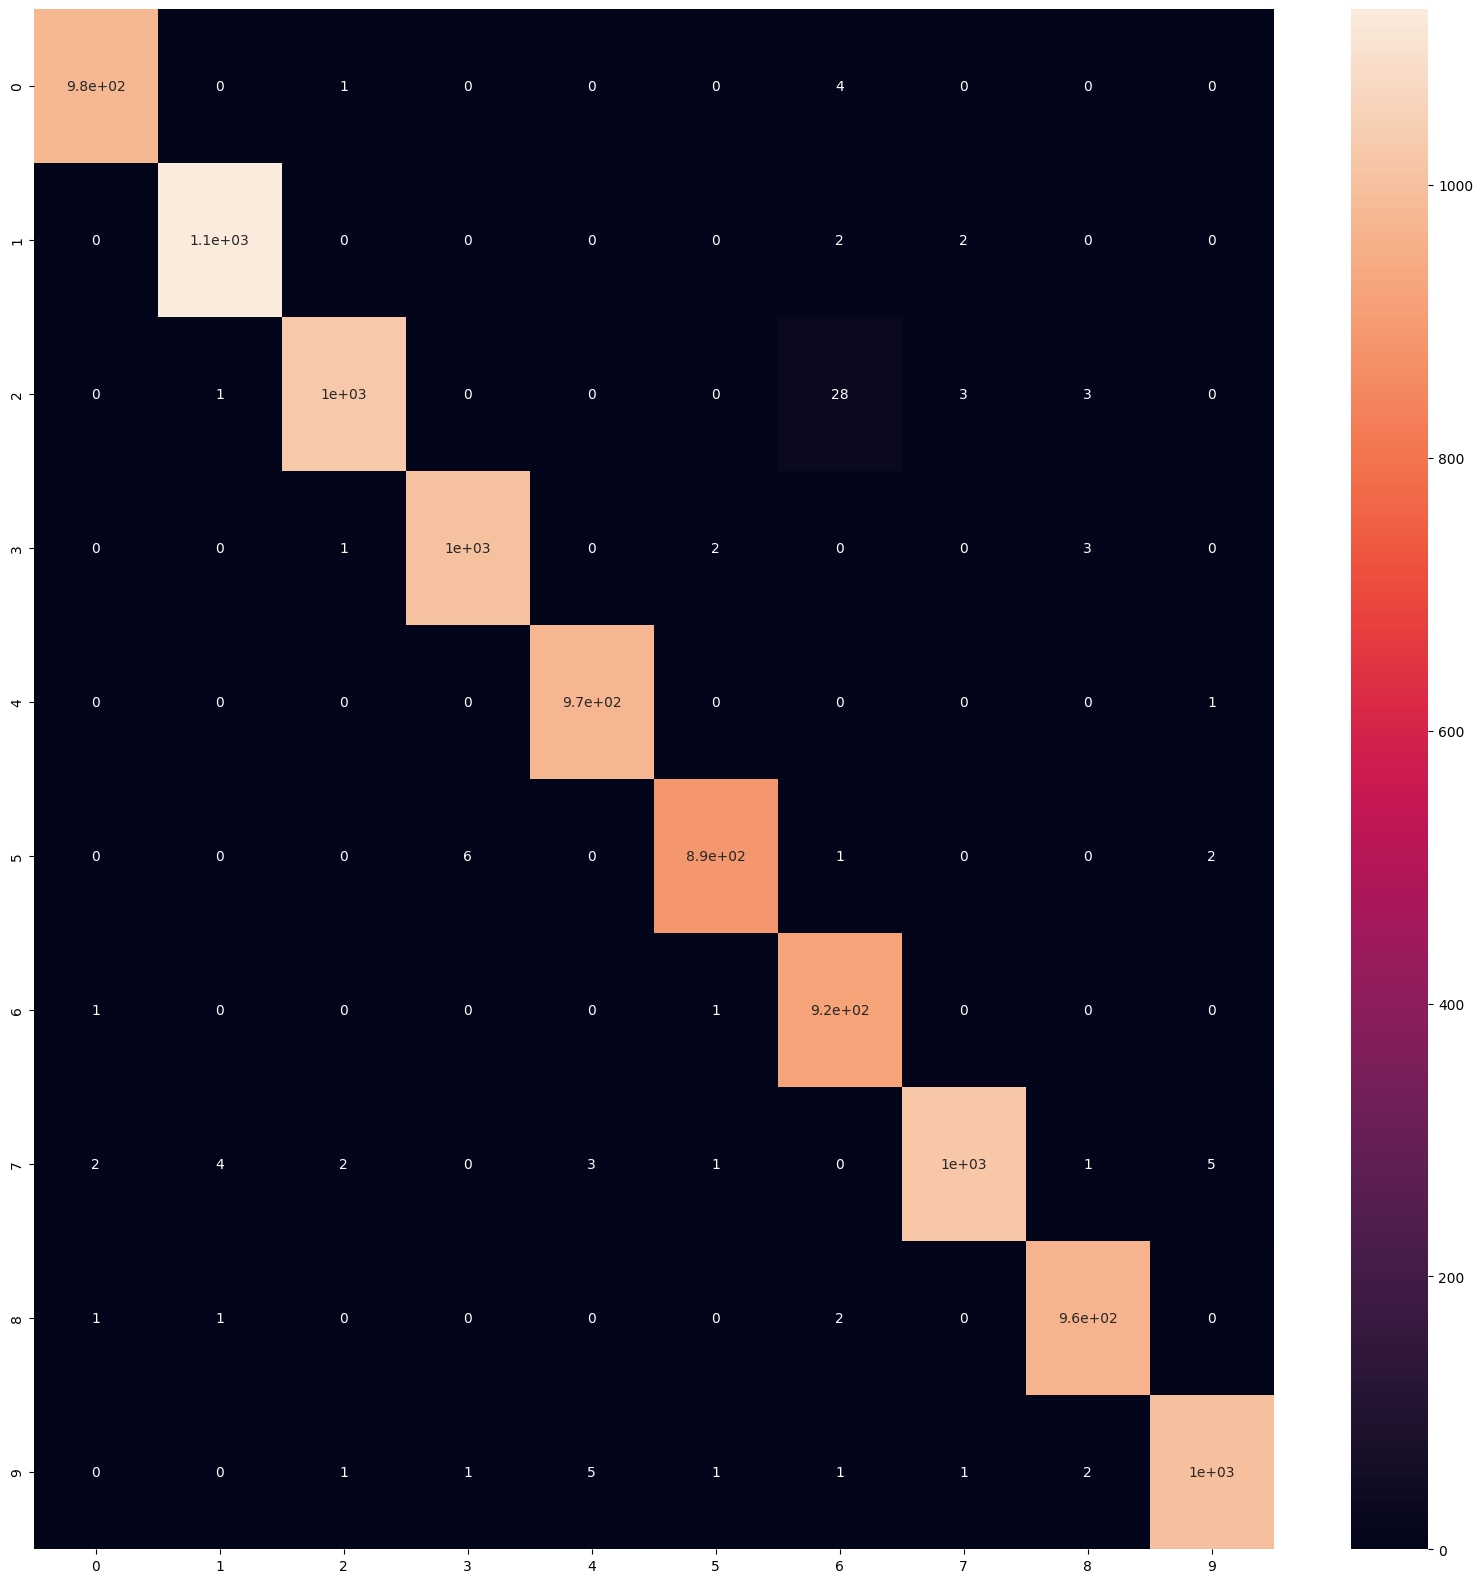

In [24]:
# TODO: vẽ confusion matrix

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(test_predictions, test_labels), annot=True, ax=ax)
plt.plot()

# Hướng dẫn nộp bài

Sau khi hoàn thành các phần code & train model, **nhớ save notebook**.

Download notebook về:

```
File > Download > Download .ipynb
```

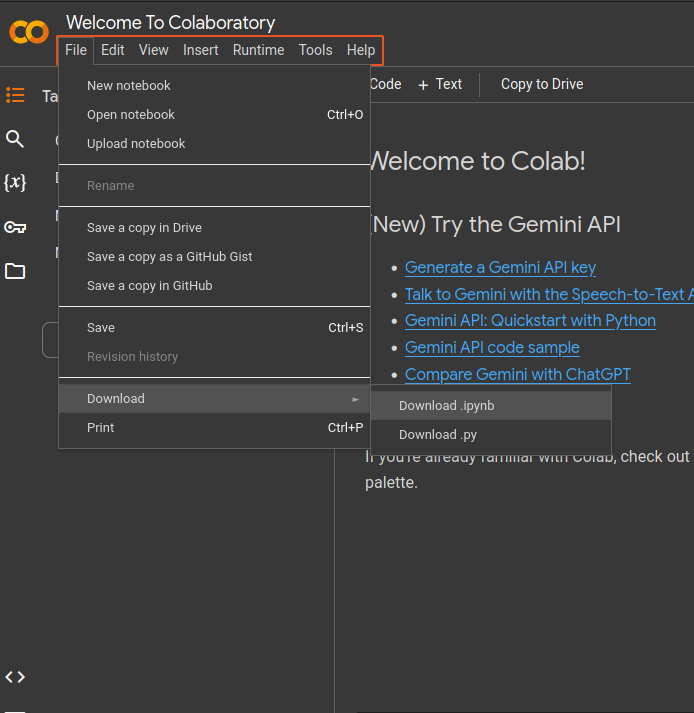

Đổi tên file notebook thành `MSSV-vgg16.ipynb` (VD: `21121234-vgg16.ipynb`), sau đó nộp lên Moodle.

Have fun & happy coding!